In [28]:
import pandas as pd
import seaborn as sn
import plotly.express as px
import probscale
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data_frame = pd.read_csv('output.csv', sep=';')
data_frame

,Este (m),Norte (m),Cota (m),CuT (%),Fe (%),Mo (%),As (%),Zn (%),CuS (%),RecCu (%),CuCo (%),Wi (kwh/ton),Alteración,Mineralización,Dominio,Ug,Step-East
0,2.9,110.2,2021.3,1.67,2.23,0.013,0.009,0.016,0.17,76.0,33.1,15.61,Cuarzo-sericita,Alta pirita,3.0,3.0,3.0
1,85.3,71.2,1971.1,1.56,4.24,0.014,0.020,0.027,0.17,89.3,26.4,13.30,Cuarzo-sericita,Alta pirita,3.0,4.0,86.0
2,86.7,142.3,1940.6,0.59,1.20,0.008,0.008,0.173,0.07,53.8,28.9,14.44,Cuarzo-sericita,Alta pirita,3.0,3.0,87.0
3,97.0,172.9,2003.9,1.15,1.59,0.007,0.008,0.052,0.07,79.6,33.8,17.70,Cuarzo-sericita,Alta pirita,3.0,3.0,97.0
4,145.3,185.2,2005.6,0.83,1.34,0.007,0.013,0.092,0.13,76.1,30.7,15.43,Cuarzo-sericita,Alta pirita,3.0,4.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Matriz de correlación

In [30]:
corrMatrix = data_frame[['Fe (%)', 'Mo (%)', 'As (%)', 'Zn (%)', 'CuS (%)']].corr()
corrMatrix

,Fe (%),Mo (%),As (%),Zn (%),CuS (%)
Fe (%),1.000000,0.040075,0.246349,0.061624,0.033003
Mo (%),0.040075,1.000000,0.389994,0.181562,0.021574
As (%),0.246349,0.389994,1.000000,0.228519,0.011424
Zn (%),0.061624,0.181562,0.228519,1.000000,0.029599
CuS (%),0.033003,0.021574,0.011424,0.029599,1.000000


<Axes: >

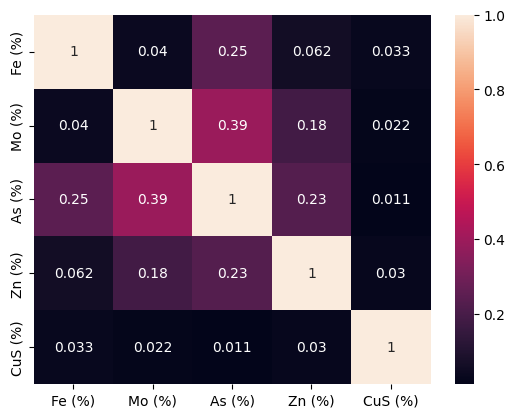

In [31]:
sn.heatmap(corrMatrix, annot=True)

## Scatter

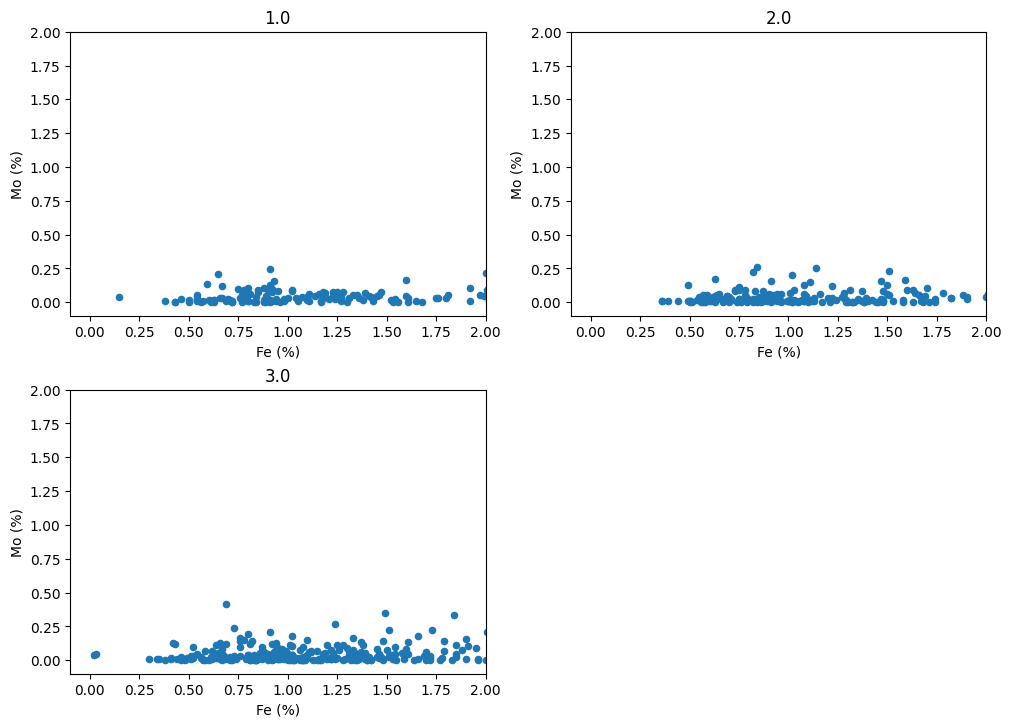

In [32]:
cols = 2
UGs = data_frame.groupby('Ug').groups.keys()
rows = int(len(data_frame.groupby('Ug').groups.keys())/cols) + 1
figure, axes = plt.subplots(rows, cols, constrained_layout=True, figsize=(10, 10))
for index, ug in enumerate(UGs):
    data_frame.groupby('Ug').get_group(ug).plot.scatter(x='Fe (%)', y='Mo (%)', title=ug, ax = axes[int(index//cols), index%cols])
    axes[int(index//cols), index%cols].set_xlim((-0.1, 2.0))
    axes[int(index//cols), index%cols].set_ylim((-0.1, 2.0))

for index in range(cols*rows):
    if (index + 1) >= len(UGs):
        figure.delaxes(axes[int(index//cols), index%cols])

plt.savefig('scatter_by_ug.png')

## Media condicional

In [33]:
step = 120.0
data_frame = data_frame.dropna(subset=['Este (m)'])
data_frame = data_frame[np.isfinite(data_frame['Este (m)'])]
data_frame['Step-East'] = step* (data_frame['Este (m)']/step).astype(int) + step/2.0
data_frame

,Este (m),Norte (m),Cota (m),CuT (%),Fe (%),Mo (%),As (%),Zn (%),CuS (%),RecCu (%),CuCo (%),Wi (kwh/ton),Alteración,Mineralización,Dominio,Ug,Step-East
0,2.9,110.2,2021.3,1.67,2.23,0.013,0.009,0.016,0.17,76.0,33.1,15.61,Cuarzo-sericita,Alta pirita,3.0,3.0,60.0
1,85.3,71.2,1971.1,1.56,4.24,0.014,0.020,0.027,0.17,89.3,26.4,13.30,Cuarzo-sericita,Alta pirita,3.0,4.0,60.0
2,86.7,142.3,1940.6,0.59,1.20,0.008,0.008,0.173,0.07,53.8,28.9,14.44,Cuarzo-sericita,Alta pirita,3.0,3.0,60.0
3,97.0,172.9,2003.9,1.15,1.59,0.007,0.008,0.052,0.07,79.6,33.8,17.70,Cuarzo-sericita,Alta pirita,3.0,3.0,60.0
4,145.3,185.2,2005.6,0.83,1.34,0.007,0.013,0.092,0.13,76.1,30.7,15.43,Cuarzo-sericita,Alta pirita,3.0,4.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,3697.8,1203.3,2201.8,0.52,3.27,0.004,0.033,0.019,0.08,82.4,23.3,15.80,Cuarzo-sericita,Alta pirita,3.0,3.0,3660.0
1108,3698.1,879.7,2038.5,0.47,1.90,0.007,0.006,0.095,0.04,73.0,25.1,13.14,Cuarzo-sericita,Alta pirita,3.0,3.0,3660.0
1109,3740.9,1151.5,2149.7,0.59,2.87,0.004,0.008,0.060,0.10,78.1,24.9,14.57,Cuarzo-sericita,Alta pirita,3.0,4.0,3780.0
1110,3750.1,1002.7,2200.6,1.27,2.08,0.012,0.006,0.010,0.07,88.8,29.5,16.62,Potásico,Alta pirita,3.0,4.0,3780.0


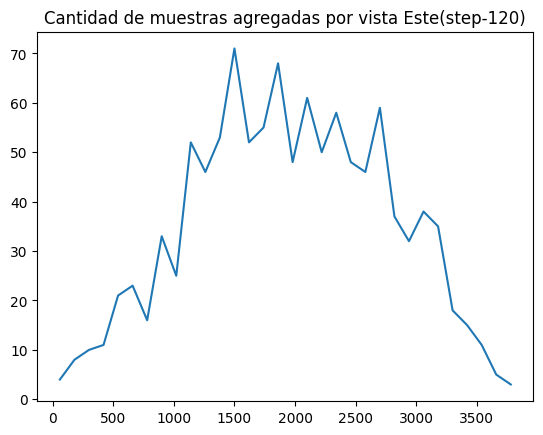

In [34]:
x = data_frame.groupby('Step-East').groups.keys()
y = data_frame.groupby('Step-East').describe()['Este (m)']['count'].values
plt.plot(list(x), y)
plt.title('Cantidad de muestras agregadas por vista Este(step-120)')
plt.savefig('step_east.png')

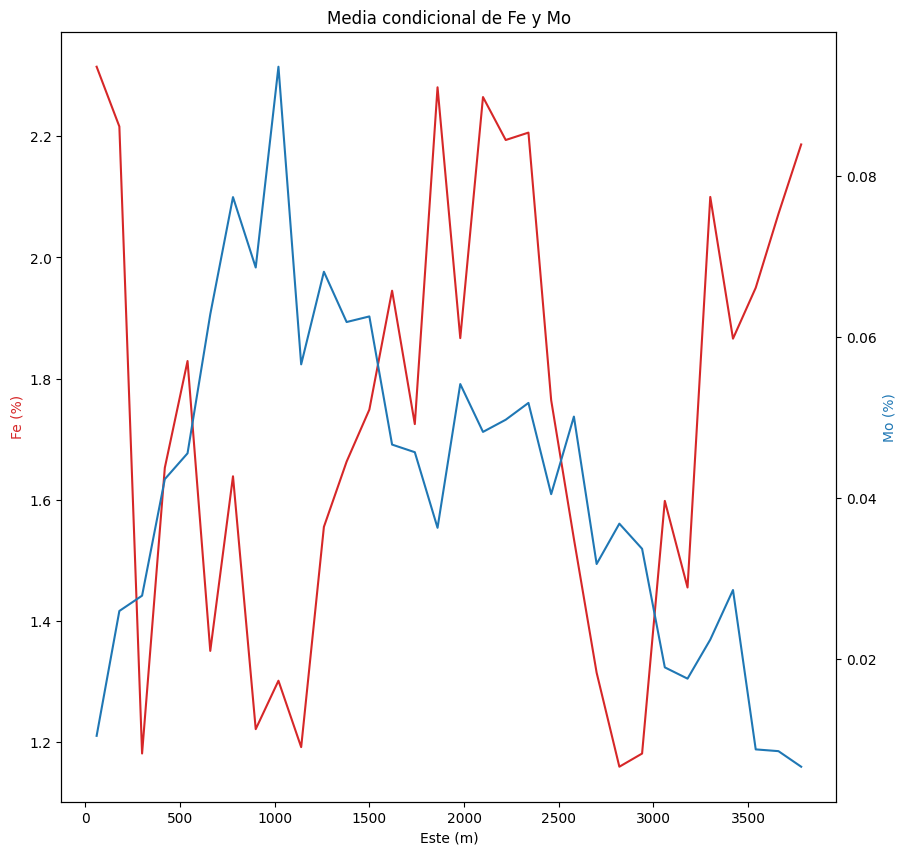

In [35]:
gruopby = data_frame.groupby('Step-East')
figure, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_xlabel('Este (m)')
ax1.plot(list(gruopby.groups.keys()), gruopby.describe()['Fe (%)']['mean'], color='tab:red')
ax1.set_ylabel('Fe (%)', color='tab:red')
ax2 = ax1.twinx()
ax2.plot(list(gruopby.groups.keys()), gruopby.describe()['Mo (%)']['mean'], color='tab:blue')
ax2.set_ylabel('Mo (%)', color='tab:blue')
plt.title('Media condicional de Fe y Mo')
plt.savefig('media_condicional.png')

In [ ]:
continuos = 'Fe (%)'
figures = px.scatter_3d(data_frame, x='Este (m)', y='Norte (m)', z='Cota', color=continuos, opacity=0.7)